In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1" #model will be trained on GPU 1

In [2]:
import tensorflow.keras
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant, RandomNormal
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file = '../data/Hz31.txt'
data = pd.read_csv(file, names=['z', 'hz', 'err'], sep = " " )
data.describe()

,z,hz,err
count,31.000000,31.000000,31.000000
mean,0.661219,105.922581,21.303226
std,0.520398,38.413424,14.587768
min,0.070000,68.600000,4.000000
25%,0.275000,78.950000,12.000000
50%,0.470000,90.000000,17.000000
75%,0.890000,121.000000,27.900000
max,1.965000,202.000000,62.000000


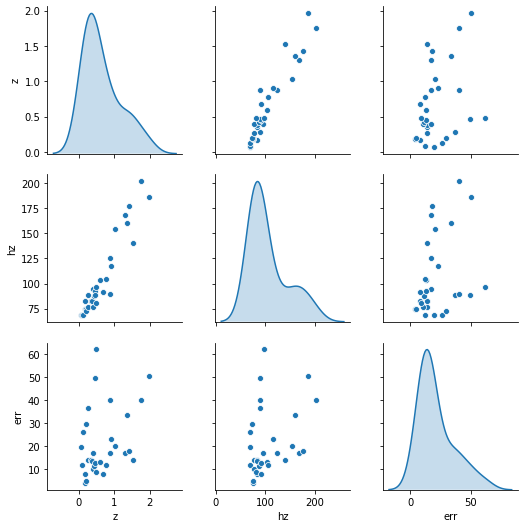

In [4]:
sns.pairplot(data, diag_kind="kde")
# plt.savefig("DistHD.png")

In [5]:
# a = np.array([25,  3,  9,  7, 19,  2, 17, 16,  6, 28, 12, 20, 21, 26, 27, 11,  1,
#        10, 30, 13, 29,  0,  8, 18, 24,  5, 23,  4, 22, 15, 14])
# randomize = np.random.permutation(len(data.values))
shuffle = [x for x in range(len(data.values)) if x%2 ==0]
comp = [x for x in range(len(data.values)) if x%2 ==1]
shuffle.extend(comp)

data = data.values[shuffle]
# shuffle

In [6]:
# def norm(x):
#     return (x - train_stats['mean']) / train_stats['std']
# normed_train_data = norm(train_dataset)
# normed_test_data = norm(test_dataset)


Read the data for cosmic chronometers

In [7]:

# odds = [x for x in range(len(data)) if x%2 ==0]
# even = [x for x in range(len(data)) if x%2 ==1]
# new_order = np.array(even+odds)
# new_order = np.array([x for x in range(len(data)-1, 0, -1)])
# data = data.values[new_order]
# data = data.values


In [8]:
z = data[:,0]
y = data[:,1:]
# print(randomize)

In [9]:
scalerz = StandardScaler()
# scalerz = MinMaxScaler(feature_range=(-1,1))
# fit scaler on data
scalerz.fit(z.reshape(-1,1))
# apply transform
z = scalerz.transform(z.reshape(-1,1))

# scalery = MinMaxScaler(feature_range=(0,1))
# scalery = StandardScaler()
# scalery.fit(y)
# y = scalery.transform(y)

In [10]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]
z_train, z_test = np.split(z, indx)
y_train, y_test = np.split(y, indx)

In [11]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
                                   min_delta=0.0,
                                   patience=50.0,
                                   restore_best_weights=True)]
#                      tf.keras.callbacks.ReduceLROnPlateau(patience=2)]
# initializer = Constant(value=0.01)
# initializer = RandomNormal()
#     efirst = Dense(150, activation='relu', input_shape=(1,))(input_z)
#     ehidden = Dense(50, activation='relu')(efirst)
# #     ehidden = Dense(150, activation='relu')(efirst)
#     ehidden2 = Dense(150, activation='relu')(ehidden)
#     ehidden2 = Dense(150, activation='relu')(ehidden2)
#     elast = Dense(2, activation='relu')(ehidden2)



In [12]:
def model(input_z):
    efirst = Dense(50, activation='relu', input_shape=(1,))(input_z)
    ehidden = Dense(200, activation='relu')(efirst)
    ehidden2 = Dense(150, activation='relu')(ehidden)
    elast = Dense(2, activation='linear')(ehidden2)


    return elast


input_z = Input(shape = (1,))
neural_model = Model(input_z, model(input_z))
neural_model.compile(loss='mean_squared_error', optimizer = "adam")
neural_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               10200     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 302       
Total params: 40,752
Trainable params: 40,752
Non-trainable params: 0
_________________________________________________________________


In [13]:
# batch_size = 4
batch_size = 4
epochs = 20
input_z = Input(shape = (1,))

In [14]:
# autoencoder = Model(input_z, autoencoder(input_z))
# autoencoder.compile(loss='mean_squared_error', optimizer = "adam")
# autoencoder.summary()

In [15]:
model_train = neural_model.fit(z_train, y_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_data=(z_test, y_test))
#                                     callbacks=callbacks)

Epoch 1/20
6/6 [==============================] - 0s 25ms/step - loss: 5362.1294 - val_loss: 10973.8662
Epoch 2/20
6/6 [==============================] - 0s 4ms/step - loss: 5317.9712 - val_loss: 10913.5293
Epoch 3/20
6/6 [==============================] - 0s 4ms/step - loss: 5264.1377 - val_loss: 10825.4873
Epoch 4/20
6/6 [==============================] - 0s 3ms/step - loss: 5184.7109 - val_loss: 10681.9893
Epoch 5/20
6/6 [==============================] - 0s 3ms/step - loss: 5049.9683 - val_loss: 10465.3105
Epoch 6/20
6/6 [==============================] - 0s 4ms/step - loss: 4844.7700 - val_loss: 10149.8779
Epoch 7/20
6/6 [==============================] - 0s 3ms/step - loss: 4554.3379 - val_loss: 9702.9111
Epoch 8/20
6/6 [==============================] - 0s 3ms/step - loss: 4112.6597 - val_loss: 9086.3877
Epoch 9/20
6/6 [==============================] - 0s 4ms/step - loss: 3570.1550 - val_loss: 8207.0049
Epoch 10/20
6/6 [==============================] - 0s 4ms/step - loss: 2860

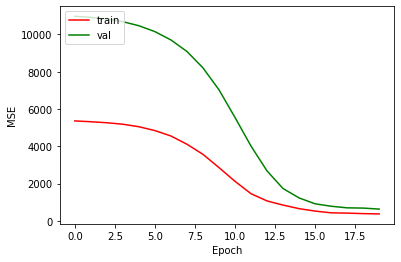

In [16]:
plt.plot(model_train.history['loss'], color='r', )
plt.plot(model_train.history['val_loss'], color='g')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig("loss_hz.png", dpi=100)


In [17]:
# neural_model.save('FFNN_Hz.h5')

In [18]:
#uncer net
unet = np.sqrt(np.min(model_train.history['val_loss']))
print(np.min(model_train.history['loss']), np.min(model_train.history['val_loss']))
# print(model_train.history['loss'][-1], model_train.history['val_loss'][-1])
# 119.81427764892578 311.0423889160156 120 epochs
# 120.7300033569336 355.0390930175781
dif_loss = model_train.history['val_loss'][-1] - model_train.history['val_loss'][-2]
val_loss = model_train.history['val_loss'][-1]
dif_loss, val_loss

376.0582580566406 634.5322265625


(-54.0340576171875, 634.5322265625)

In [19]:
pred = neural_model.predict(z_test)
pred

array([[ 63.268364,  13.047401],
       [ 69.57563 ,  14.407831],
       [ 82.04552 ,  17.011108],
       [ 84.718124,  17.565187],
       [135.9505  ,  28.16274 ],
       [153.98593 ,  31.890713],
       [198.38083 ,  41.06725 ]], dtype=float32)

In [20]:
#zor and yor are the original velues for z and [Hz, err]
zor = scalerz.inverse_transform(z.reshape(-1,1))
# yor = scalery.inverse_transform(y)

In [21]:
# ranz = np.random.uniform(0, 2, size=10000)
ranz = np.linspace(0, 2, 1000)
r = scalerz.transform(ranz.reshape(-1, 1))
pred_random = neural_model.predict(r)
rr = scalerz.inverse_transform(r.reshape(-1,1))
# predy = scalery.inverse_transform(pred_random)


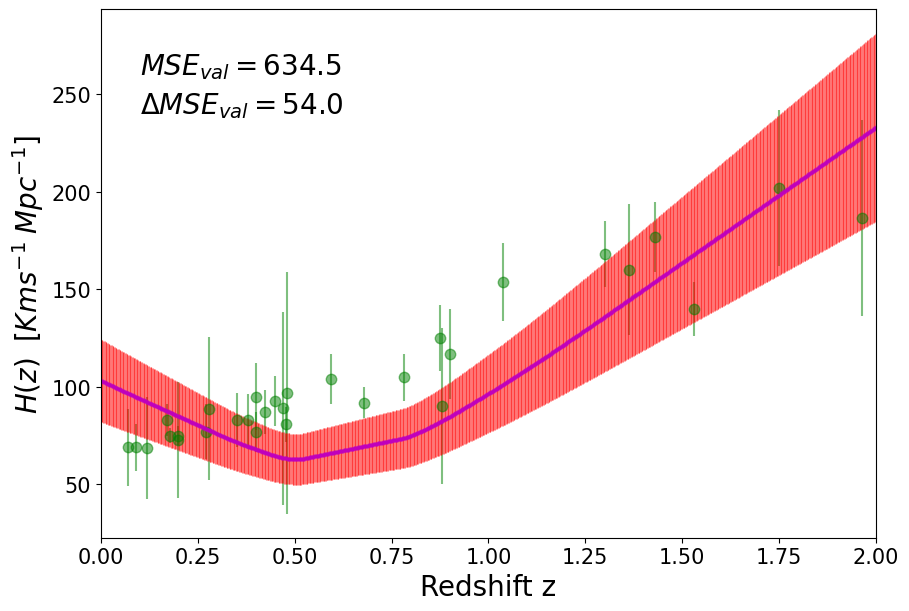

In [53]:
# plt.errorbar(zor, yor[:,0], yor[:,1], fmt='g.', markersize=15, label='Observations', alpha=0.5)
# plt.errorbar(rr, predy[:,0], predy[:,1], fmt='r.', markersize=5, label='Synthetic', alpha=0.01)
plt.figure(figsize=(10, 7), dpi=100)
plt.errorbar(zor, y[:,0], y[:,1], fmt='g.', markersize=15, label='Observations', alpha=0.5)
plt.errorbar(rr, pred_random[:,0], pred_random[:,1], markersize=2, fmt='o', 
             ecolor='r', capthick=2, elinewidth=0.8, alpha=0.5, c='m')
plt.xlabel("Redshift z", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.text( 0.1, 260, "$MSE_{val} =  634.5$", fontsize=20 )
plt.text( 0.1, 240, "$\Delta MSE_{val} = 54.0$", fontsize=20 )
plt.ylabel("$H(z) \;\; [Kms^{-1} \; Mpc^{-1}]$", fontsize=20)
plt.xlim(0, 2)
# plt.savefig("20_epochs_HD.png")

In [23]:
# Cosmological constants
Om = 0.27
# variance network


In [24]:
def Hlcdm(z, H0=73.24):
    return H0 * np.sqrt(Om*(1+z)**3 + 1 - Om)

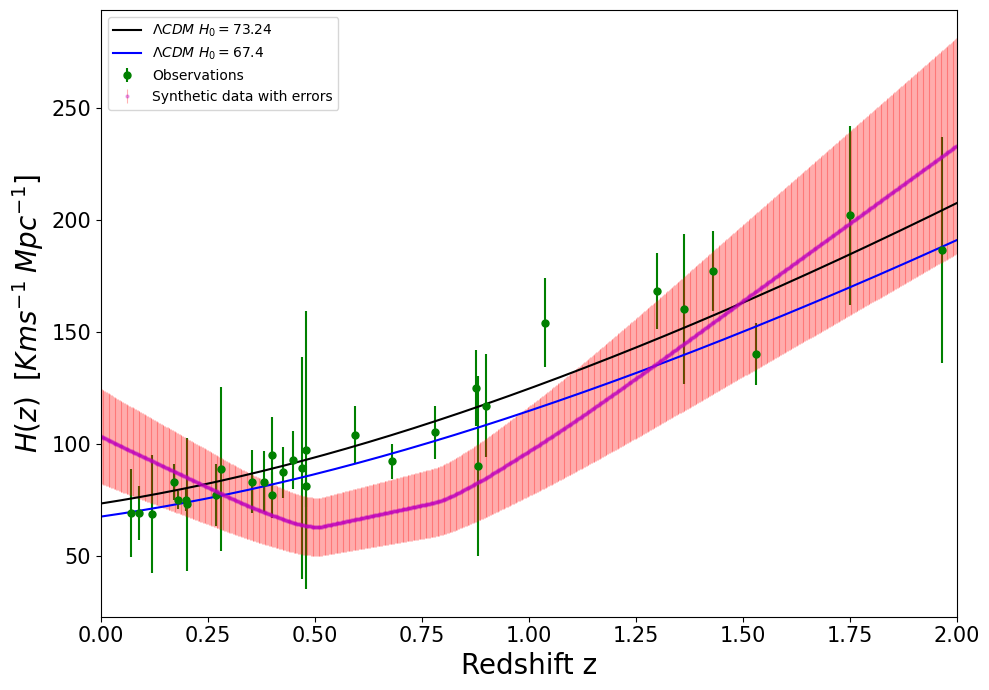

In [25]:
plt.figure(figsize=(10, 7), dpi=100)

zmodel = np.linspace(0, 2, 1000)
# plt.errorbar(zor, yor[:,0], yor[:,1], fmt='g.', markersize=10, label='Observations')
# plt.errorbar(rr, predy[:,0], predy[:,1], fmt='r.', markersize=4., label='Synthetic data with errors', alpha=0.01)
plt.errorbar(zor, y[:,0], y[:,1], fmt='g.', markersize=10, label='Observations')

plt.errorbar(rr, pred_random[:,0], pred_random[:,1], markersize=2., fmt='o', 
             ecolor='r', capthick=2, elinewidth=0.8, alpha=0.3, c='m',
             label='Synthetic data with errors')

plt.plot(zmodel, Hlcdm(zmodel), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
plt.plot(zmodel, Hlcdm(zmodel, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlabel("Redshift z", fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("$H(z) \;\; [Kms^{-1} \; Mpc^{-1}]$", fontsize=20)
plt.yticks(fontsize=15)
plt.xlim(0, 2)
plt.tight_layout()
plt.legend(loc='upper left')


# plt.savefig("SyntheticHDrelu5.png",dpi=80)

## $H_0$

In [26]:
h0 = pred_random[0,:]
h0

array([103.259056,  21.18636 ], dtype=float32)

In [27]:
pred_random.shape, r.shape

((1000, 2), (1000, 1))

In [28]:
# randomselection = np.random.randint(0,1000,50)
# randomselection = np.random.randint(0,1000,100)

# rr_reduced = rr[randomselection,:]
# predy_reduced = predy[randomselection,:]

# predy_reduced = pred_random[randomselection,:]
rr_reduced = rr
predy_reduced = pred_random

In [29]:
mookHz = np.concatenate((rr_reduced.reshape(-1,1), predy_reduced), axis=1)


# np.savetxt("autoEncoderHz50.dat",mookHz, delimiter=" ")

In [30]:
predy_reduced[:,1]

array([21.18636  , 21.147701 , 21.109037 , 21.070368 , 21.03171  ,
       20.993048 , 20.954388 , 20.915728 , 20.87707  , 20.838404 ,
       20.79974  , 20.761078 , 20.722414 , 20.683758 , 20.645094 ,
       20.606432 , 20.56777  , 20.529106 , 20.490446 , 20.451786 ,
       20.413122 , 20.37446  , 20.335796 , 20.297136 , 20.258474 ,
       20.219893 , 20.182184 , 20.14514  , 20.108305 , 20.071472 ,
       20.03464  , 19.997805 , 19.960972 , 19.924139 , 19.887299 ,
       19.85047  , 19.813635 , 19.776806 , 19.73997  , 19.703135 ,
       19.666304 , 19.629469 , 19.592634 , 19.555803 , 19.518967 ,
       19.482136 , 19.4453   , 19.408468 , 19.371634 , 19.3348   ,
       19.297966 , 19.261133 , 19.224302 , 19.187466 , 19.150633 ,
       19.113798 , 19.076965 , 19.040133 , 19.003302 , 18.966465 ,
       18.92963  , 18.892797 , 18.855965 , 18.819132 , 18.782297 ,
       18.74546  , 18.708632 , 18.671799 , 18.634964 , 18.598131 ,
       18.561298 , 18.524462 , 18.487629 , 18.450798 , 18.4139

In [31]:
error  = predy_reduced[:,1]**2
error

array([ 448.86182,  447.22528,  445.59146,  443.9604 ,  442.33282,
        440.70804,  439.08636,  437.46765,  435.85202,  434.23907,
        432.62918,  431.02237,  429.41846,  427.81784,  426.2199 ,
        424.62503,  423.03317,  421.4442 ,  419.85837,  418.27554,
        416.69556,  415.11862,  413.54462,  411.97375,  410.4058 ,
        408.84406,  407.32056,  405.82666,  404.34393,  402.86398,
        401.38678,  399.9122 ,  398.4404 ,  396.9713 ,  395.50464,
        394.04114,  392.58014,  391.12204,  389.66638,  388.2135 ,
        386.7635 ,  385.31604,  383.8713 ,  382.42944,  380.99005,
        379.55362,  378.11966,  376.68863,  375.2602 ,  373.83453,
        372.4115 ,  370.99124,  369.5738 ,  368.15884,  366.74673,
        365.33728,  363.9306 ,  362.52664,  361.12546,  359.7268 ,
        358.3309 ,  356.9378 ,  355.5474 ,  354.15973,  352.7747 ,
        351.3923 ,  350.01288,  348.63608,  347.26187,  345.89047,
        344.5218 ,  343.15567,  341.79242,  340.43195,  339.07

In [32]:
diagcov = np.diag(error) #inverso
# np.savetxt("autoEncoderHz_cov50.dat", diagcov, delimiter= " ", header="#50 50")
np.shape(diagcov)

(1000, 1000)

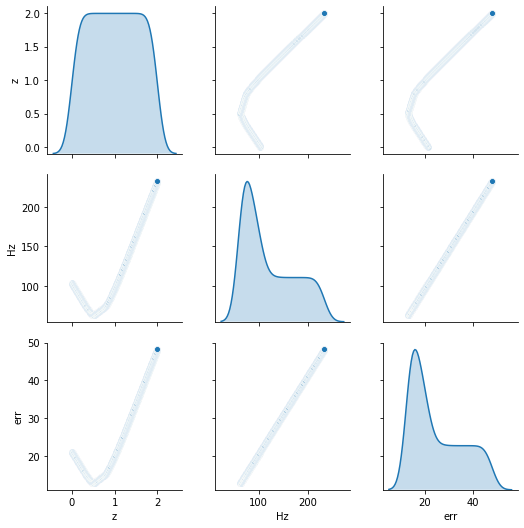

In [33]:
dfMook = pd.DataFrame(mookHz, columns=['z', 'Hz', 'err'])
sns.pairplot(dfMook, diag_kind="kde")
# plt.savefig("50hdmook.png")

In [34]:
# plt.plot(model_train.history['loss'], color='r')
# plt.plot(model_train.history['val_loss'], color='g')
# plt.xlim(1)
# plt.xscale('log')
# plt.ylabel('MSE')
# # plt.yscale('log')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper right')
# # plt.savefig("loss_hz.png", dpi=200)
# # plt.savefig("epochs_for_Hz.png", dpi=200)

In [35]:
def model2(input_z):
    x = Dense(50, activation='relu', input_shape=(1,))(input_z)
    x = Dense(200, activation='relu')(x)
    x = Dense(150, activation='relu')(x)
    x = Dense(2, activation='linear')(x)


    return elast


input_z = Input(shape = (1,))
neural_model2 = Model(input_z, model(input_z))
neural_model2.compile(loss='mean_squared_error', optimizer = "adam")
neural_model2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_5 (Dense)              (None, 200)               10200     
_________________________________________________________________
dense_6 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 302       
Total params: 40,752
Trainable params: 40,752
Non-trainable params: 0
_________________________________________________________________


#### Now, we not use the statistical error and only use a ANN to given redshift predict $H(z)$. And we estimates its uncertainty with dropout layers.

In [36]:
yy = y[:,0].reshape(-1,1)
zz = z
split = 0.8
ntrain = int(split * len(zz))
indx = [ntrain]
zz_train, zz_test = np.split(zz, indx)
yy_train, yy_test = np.split(yy, indx)
np.shape(zz_train), np.shape(yy_train), np.shape(zz_test), np.shape(yy_test)

((24, 1), (24, 1), (7, 1), (7, 1))

In [37]:
from astroNN.nn.layers import MCDropout

In [38]:
def model_regression_dropout(num_hidden):
    # Defeine Keras model for regression
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(batch_input_shape=((None, 1))))
    model.add(Dense(units=num_hidden[0], 
#                     kernel_regularizer=tf.keras.regularizers.l2(1e-4),
#                     kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(MCDropout(0.3))
    model.add(Dense(units=num_hidden[1], 
#                     kernel_regularizer=tf.keras.regularizers.l2(1e-4),
#                     kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(MCDropout(0.3))
    model.add(Dense(units=num_hidden[2], 
#                     kernel_regularizer=tf.keras.regularizers.l2(1e-4),
#                     kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(MCDropout(0.3))
    model.add(Dense(units=2, activation="linear"))
    return model

#Define some parameter
batch_size = 4
# optimizer = Adam(lr=.005)
optimizer = Adam(lr=0.0001)


# Compile Keras model
model = model_regression_dropout(num_hidden=[50, 200, 150])
model.compile(loss='mse', optimizer=optimizer) 
# model2_train = model.fit(zz_train, yy_train, 
# #                          validation_split=0.0, 
#                          batch_size=batch_size, epochs=1000, verbose=1,
#                          validation_data=(zz_test, yy_test))    
model2_train = model.fit(z_train, y_train, batch_size=batch_size,
                                    epochs=800,verbose=1,
                                    validation_data=(z_test, y_test))

Epoch 1/800
6/6 [==============================] - 0s 18ms/step - loss: 5377.0449 - val_loss: 11026.4688
Epoch 2/800
6/6 [==============================] - 0s 4ms/step - loss: 5368.0625 - val_loss: 11015.9043
Epoch 3/800
6/6 [==============================] - 0s 4ms/step - loss: 5367.1187 - val_loss: 11007.4111
Epoch 4/800
6/6 [==============================] - 0s 4ms/step - loss: 5365.7749 - val_loss: 11009.5488
Epoch 5/800
6/6 [==============================] - 0s 4ms/step - loss: 5358.7373 - val_loss: 11001.4980
Epoch 6/800
6/6 [==============================] - 0s 5ms/step - loss: 5354.1729 - val_loss: 10990.3740
Epoch 7/800
6/6 [==============================] - 0s 4ms/step - loss: 5355.1787 - val_loss: 11000.0674
Epoch 8/800
6/6 [==============================] - 0s 4ms/step - loss: 5353.3145 - val_loss: 10983.0850
Epoch 9/800
6/6 [==============================] - 0s 4ms/step - loss: 5348.8911 - val_loss: 10980.4756
Epoch 10/800
6/6 [==============================] - 0s 4ms/step

6/6 [==============================] - 0s 4ms/step - loss: 2436.4519 - val_loss: 7168.4683
Epoch 80/800
6/6 [==============================] - 0s 4ms/step - loss: 2401.5359 - val_loss: 7125.4165
Epoch 81/800
6/6 [==============================] - 0s 3ms/step - loss: 2305.5898 - val_loss: 6559.1006
Epoch 82/800
6/6 [==============================] - 0s 3ms/step - loss: 2259.9202 - val_loss: 6963.1680
Epoch 83/800
6/6 [==============================] - 0s 3ms/step - loss: 2095.5042 - val_loss: 5800.4321
Epoch 84/800
6/6 [==============================] - 0s 3ms/step - loss: 2164.2458 - val_loss: 6151.9443
Epoch 85/800
6/6 [==============================] - 0s 4ms/step - loss: 1921.2828 - val_loss: 6038.7661
Epoch 86/800
6/6 [==============================] - 0s 4ms/step - loss: 1882.5493 - val_loss: 5504.8169
Epoch 87/800
6/6 [==============================] - 0s 3ms/step - loss: 1842.4590 - val_loss: 5634.3921
Epoch 88/800
6/6 [==============================] - 0s 3ms/step - loss: 1727.

Epoch 158/800
6/6 [==============================] - 0s 4ms/step - loss: 488.1006 - val_loss: 1062.4397
Epoch 159/800
6/6 [==============================] - 0s 3ms/step - loss: 514.7899 - val_loss: 1090.0801
Epoch 160/800
6/6 [==============================] - 0s 3ms/step - loss: 535.5474 - val_loss: 1393.0909
Epoch 161/800
6/6 [==============================] - 0s 3ms/step - loss: 736.8376 - val_loss: 1656.8750
Epoch 162/800
6/6 [==============================] - 0s 3ms/step - loss: 415.8540 - val_loss: 953.0702
Epoch 163/800
6/6 [==============================] - 0s 3ms/step - loss: 491.6541 - val_loss: 1344.6808
Epoch 164/800
6/6 [==============================] - 0s 3ms/step - loss: 512.5984 - val_loss: 1121.7042
Epoch 165/800
6/6 [==============================] - 0s 4ms/step - loss: 501.2316 - val_loss: 1339.0251
Epoch 166/800
6/6 [==============================] - 0s 4ms/step - loss: 385.7415 - val_loss: 1078.0210
Epoch 167/800
6/6 [==============================] - 0s 4ms/step 

6/6 [==============================] - 0s 3ms/step - loss: 358.7962 - val_loss: 699.4152
Epoch 238/800
6/6 [==============================] - 0s 3ms/step - loss: 327.8958 - val_loss: 519.0931
Epoch 239/800
6/6 [==============================] - 0s 4ms/step - loss: 340.0738 - val_loss: 600.8399
Epoch 240/800
6/6 [==============================] - 0s 3ms/step - loss: 394.2906 - val_loss: 527.4200
Epoch 241/800
6/6 [==============================] - 0s 3ms/step - loss: 257.0554 - val_loss: 541.8987
Epoch 242/800
6/6 [==============================] - 0s 3ms/step - loss: 353.4196 - val_loss: 820.2377
Epoch 243/800
6/6 [==============================] - 0s 3ms/step - loss: 370.1916 - val_loss: 397.3221
Epoch 244/800
6/6 [==============================] - 0s 3ms/step - loss: 284.5027 - val_loss: 819.1843
Epoch 245/800
6/6 [==============================] - 0s 3ms/step - loss: 306.5642 - val_loss: 826.5861
Epoch 246/800
6/6 [==============================] - 0s 3ms/step - loss: 352.0674 - val

6/6 [==============================] - 0s 4ms/step - loss: 259.4476 - val_loss: 425.7300
Epoch 317/800
6/6 [==============================] - 0s 3ms/step - loss: 318.8244 - val_loss: 961.3350
Epoch 318/800
6/6 [==============================] - 0s 4ms/step - loss: 345.1054 - val_loss: 557.2316
Epoch 319/800
6/6 [==============================] - 0s 4ms/step - loss: 241.0492 - val_loss: 672.5421
Epoch 320/800
6/6 [==============================] - 0s 4ms/step - loss: 303.3170 - val_loss: 823.5523
Epoch 321/800
6/6 [==============================] - 0s 4ms/step - loss: 213.2786 - val_loss: 616.3663
Epoch 322/800
6/6 [==============================] - 0s 4ms/step - loss: 327.8568 - val_loss: 386.9337
Epoch 323/800
6/6 [==============================] - 0s 3ms/step - loss: 279.8916 - val_loss: 771.4367
Epoch 324/800
6/6 [==============================] - 0s 3ms/step - loss: 356.3654 - val_loss: 464.9178
Epoch 325/800
6/6 [==============================] - 0s 3ms/step - loss: 361.8374 - val

6/6 [==============================] - 0s 4ms/step - loss: 369.9044 - val_loss: 798.9247
Epoch 396/800
6/6 [==============================] - 0s 3ms/step - loss: 224.2505 - val_loss: 385.1084
Epoch 397/800
6/6 [==============================] - 0s 4ms/step - loss: 276.0818 - val_loss: 580.7288
Epoch 398/800
6/6 [==============================] - 0s 4ms/step - loss: 229.2365 - val_loss: 756.2775
Epoch 399/800
6/6 [==============================] - 0s 4ms/step - loss: 211.4216 - val_loss: 262.1207
Epoch 400/800
6/6 [==============================] - 0s 4ms/step - loss: 207.3588 - val_loss: 896.4904
Epoch 401/800
6/6 [==============================] - 0s 3ms/step - loss: 315.2426 - val_loss: 361.6983
Epoch 402/800
6/6 [==============================] - 0s 3ms/step - loss: 305.4010 - val_loss: 583.2470
Epoch 403/800
6/6 [==============================] - 0s 4ms/step - loss: 276.3639 - val_loss: 595.4090
Epoch 404/800
6/6 [==============================] - 0s 4ms/step - loss: 355.6073 - val

6/6 [==============================] - 0s 4ms/step - loss: 282.1580 - val_loss: 848.7913
Epoch 475/800
6/6 [==============================] - 0s 4ms/step - loss: 311.6562 - val_loss: 463.1163
Epoch 476/800
6/6 [==============================] - 0s 4ms/step - loss: 256.7962 - val_loss: 639.3076
Epoch 477/800
6/6 [==============================] - 0s 4ms/step - loss: 222.5879 - val_loss: 294.5880
Epoch 478/800
6/6 [==============================] - 0s 4ms/step - loss: 164.4855 - val_loss: 739.2327
Epoch 479/800
6/6 [==============================] - 0s 4ms/step - loss: 223.8544 - val_loss: 606.3649
Epoch 480/800
6/6 [==============================] - 0s 4ms/step - loss: 334.5237 - val_loss: 472.1364
Epoch 481/800
6/6 [==============================] - 0s 3ms/step - loss: 184.8508 - val_loss: 419.5564
Epoch 482/800
6/6 [==============================] - 0s 3ms/step - loss: 237.2583 - val_loss: 704.2718
Epoch 483/800
6/6 [==============================] - 0s 3ms/step - loss: 273.9896 - val

6/6 [==============================] - 0s 5ms/step - loss: 205.7712 - val_loss: 612.4554
Epoch 554/800
6/6 [==============================] - 0s 4ms/step - loss: 241.2528 - val_loss: 475.7552
Epoch 555/800
6/6 [==============================] - 0s 4ms/step - loss: 283.7079 - val_loss: 599.4083
Epoch 556/800
6/6 [==============================] - 0s 3ms/step - loss: 197.1221 - val_loss: 442.1770
Epoch 557/800
6/6 [==============================] - 0s 3ms/step - loss: 239.5601 - val_loss: 537.3234
Epoch 558/800
6/6 [==============================] - 0s 3ms/step - loss: 248.8484 - val_loss: 531.5251
Epoch 559/800
6/6 [==============================] - 0s 3ms/step - loss: 205.6048 - val_loss: 574.1174
Epoch 560/800
6/6 [==============================] - 0s 4ms/step - loss: 216.7042 - val_loss: 570.3288
Epoch 561/800
6/6 [==============================] - 0s 4ms/step - loss: 356.2870 - val_loss: 475.5247
Epoch 562/800
6/6 [==============================] - 0s 4ms/step - loss: 241.6936 - val

6/6 [==============================] - 0s 4ms/step - loss: 249.7499 - val_loss: 503.8808
Epoch 633/800
6/6 [==============================] - 0s 3ms/step - loss: 236.3741 - val_loss: 493.9820
Epoch 634/800
6/6 [==============================] - 0s 3ms/step - loss: 144.1794 - val_loss: 545.7578
Epoch 635/800
6/6 [==============================] - 0s 4ms/step - loss: 237.7749 - val_loss: 415.6006
Epoch 636/800
6/6 [==============================] - 0s 4ms/step - loss: 157.8899 - val_loss: 560.4800
Epoch 637/800
6/6 [==============================] - 0s 4ms/step - loss: 236.5499 - val_loss: 632.4730
Epoch 638/800
6/6 [==============================] - 0s 4ms/step - loss: 170.4888 - val_loss: 658.9898
Epoch 639/800
6/6 [==============================] - 0s 4ms/step - loss: 285.6986 - val_loss: 834.2968
Epoch 640/800
6/6 [==============================] - 0s 4ms/step - loss: 188.2514 - val_loss: 619.2242
Epoch 641/800
6/6 [==============================] - 0s 4ms/step - loss: 150.0951 - val

6/6 [==============================] - 0s 3ms/step - loss: 235.0820 - val_loss: 664.9882
Epoch 712/800
6/6 [==============================] - 0s 4ms/step - loss: 349.6677 - val_loss: 694.7161
Epoch 713/800
6/6 [==============================] - 0s 4ms/step - loss: 213.1329 - val_loss: 780.7568
Epoch 714/800
6/6 [==============================] - 0s 3ms/step - loss: 198.9781 - val_loss: 473.5265
Epoch 715/800
6/6 [==============================] - 0s 3ms/step - loss: 238.3450 - val_loss: 648.1382
Epoch 716/800
6/6 [==============================] - 0s 4ms/step - loss: 204.9250 - val_loss: 479.1019
Epoch 717/800
6/6 [==============================] - 0s 3ms/step - loss: 197.9674 - val_loss: 489.3297
Epoch 718/800
6/6 [==============================] - 0s 4ms/step - loss: 200.5838 - val_loss: 598.4629
Epoch 719/800
6/6 [==============================] - 0s 4ms/step - loss: 271.8752 - val_loss: 511.2674
Epoch 720/800
6/6 [==============================] - 0s 4ms/step - loss: 283.8593 - val

6/6 [==============================] - 0s 4ms/step - loss: 203.3324 - val_loss: 722.1075
Epoch 791/800
6/6 [==============================] - 0s 4ms/step - loss: 161.2529 - val_loss: 746.7621
Epoch 792/800
6/6 [==============================] - 0s 3ms/step - loss: 199.8526 - val_loss: 400.3358
Epoch 793/800
6/6 [==============================] - 0s 3ms/step - loss: 233.8175 - val_loss: 870.8918
Epoch 794/800
6/6 [==============================] - 0s 4ms/step - loss: 216.6452 - val_loss: 606.5819
Epoch 795/800
6/6 [==============================] - 0s 4ms/step - loss: 195.5003 - val_loss: 660.3452
Epoch 796/800
6/6 [==============================] - 0s 4ms/step - loss: 232.2158 - val_loss: 284.6562
Epoch 797/800
6/6 [==============================] - 0s 3ms/step - loss: 194.8580 - val_loss: 360.2731
Epoch 798/800
6/6 [==============================] - 0s 4ms/step - loss: 252.8309 - val_loss: 491.7372
Epoch 799/800
6/6 [==============================] - 0s 4ms/step - loss: 226.6674 - val

In [39]:
# Generate test data
test_batch_size = 1000
# x_test = np.random.uniform(0, 2., test_batch_size)
x_test = np.linspace(0, 2., test_batch_size)

mc_dropout_num = 100  # Run Dropout 100 times
predictions = np.zeros((mc_dropout_num, test_batch_size, 2))
uncertainty = np.zeros((mc_dropout_num, test_batch_size, 1))
for i in range(mc_dropout_num):
    predictions[i] = model.predict(scalerz.transform(x_test.reshape(-1,1)))
    
# get mean results and its varience
prediction_mc_dropout = np.mean(predictions, axis=0)
std_mc_dropout = np.std(predictions, axis=0)

In [40]:
np.mean(std_mc_dropout[:,0]), np.mean(std_mc_dropout[:,1])

(15.68722861687894, 5.089010729707892)

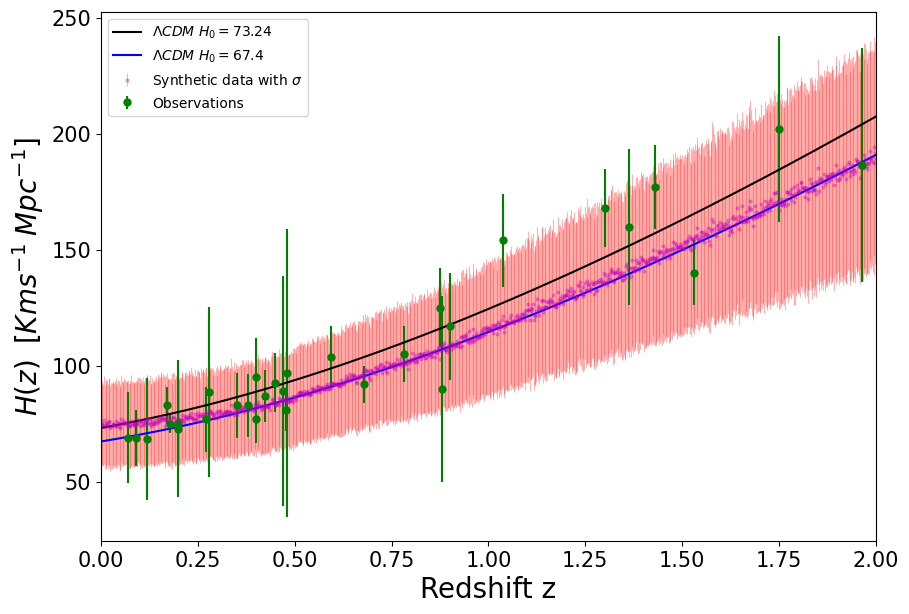

In [56]:
# Plotting
plt.figure(figsize=(10, 7), dpi=100)
# plt.figure(figsize=(5, 4), dpi=100)
sigma = np.sqrt(std_mc_dropout[:, 0]**2 + std_mc_dropout[:, 1]**2+ prediction_mc_dropout[:,1]**2)
plt.errorbar(x_test, prediction_mc_dropout[:,0], yerr=sigma, markersize=2, fmt='o', 
             ecolor='r', capthick=2, elinewidth=0.8, alpha=0.3, c='m',
             label='Synthetic data with $\sigma$')

# plt.scatter(scalerz.inverse_transform(zz), yy, color='k', label='Original cosmic chronometers')
plt.errorbar(zor, y[:,0], y[:,1], fmt='g.', markersize=10, label='Observations')
plt.plot(zmodel, Hlcdm(zmodel), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
plt.plot(zmodel, Hlcdm(zmodel, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlim(0,2)
# plt.xlabel('Redshift')
# plt.ylabel('$H(z)$')
plt.ylabel("$H(z) \;\; [Kms^{-1} \; Mpc^{-1}]$", fontsize=20)
plt.xlabel("Redshift z", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.legend(loc='best')
plt.legend(loc='upper left')
# plt.show()
# plt.savefig('Hz_dropout800.png', dpi=80)

## $H_0$

In [42]:
 prediction_mc_dropout[0,:]

array([74.73409378, 15.45803553])

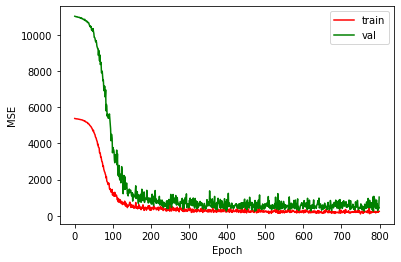

In [43]:
plt.plot(model2_train.history['loss'], color='r')
plt.plot(model2_train.history['val_loss'], color='g')
plt.ylabel('MSE')
plt.xlabel('Epoch')
# plt.xscale('log')
plt.legend(['train', 'val'], loc='upper right')
# plt.savefig('lossHzdropout10mil.png', dpi=100)

In [44]:
# model.save('FFNN+MC-DO_Hz.h5')

In [45]:
mookdpHz = np.concatenate((x_test.reshape(-1,1), prediction_mc_dropout), axis=1)

# np.savetxt("autoEncoderHz50dropout.dat",mookdpHz, delimiter=" ")

In [46]:
diagcov2 = np.diag(sigma**2) #inverso
# np.savetxt("autoEncoderHz_cov50dropout.dat", diagcov2, delimiter= " ", header="#50 50")

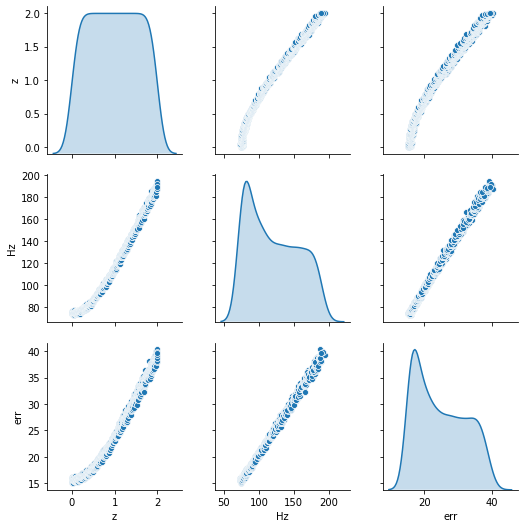

In [47]:
dfMook = pd.DataFrame(mookdpHz, columns=['z', 'Hz', 'err'])
sns.pairplot(dfMook, diag_kind="kde")
# plt.savefig("50hdmookdropout.png")